In [81]:
#import all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
dataset=pd.read_csv("C:/Users/Riddhi Shah/Desktop/ml/Practice/train.csv")

In [83]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
dataset.shape

(1460, 81)

# preprocessing 

In [85]:
feature_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1] #check for null values in dataset
print(len(feature_with_nan))

18


In [86]:
for feature in feature_with_nan: #percentage of missing values in column 
    print("{}:{}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage:0.1774% missing values
Alley:0.9377% missing values
MasVnrType:0.0055% missing values
MasVnrArea:0.0055% missing values
BsmtQual:0.0253% missing values
BsmtCond:0.0253% missing values
BsmtExposure:0.026% missing values
BsmtFinType1:0.0253% missing values
BsmtFinType2:0.026% missing values
FireplaceQu:0.4726% missing values
GarageType:0.0555% missing values
GarageYrBlt:0.0555% missing values
GarageFinish:0.0555% missing values
GarageQual:0.0555% missing values
GarageCond:0.0555% missing values
PoolQC:0.9952% missing values
Fence:0.8075% missing values
MiscFeature:0.963% missing values


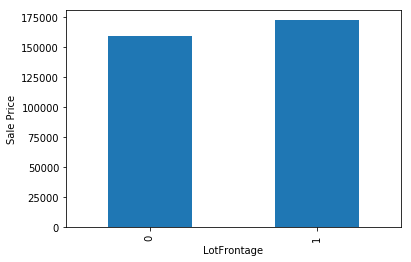

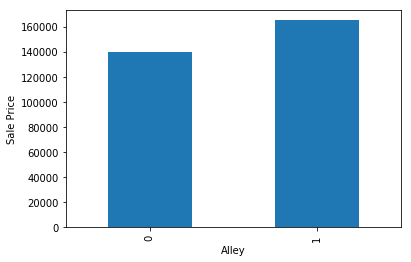

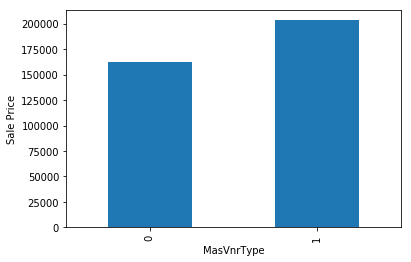

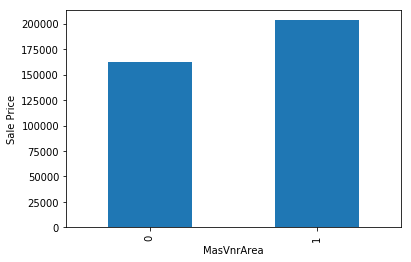

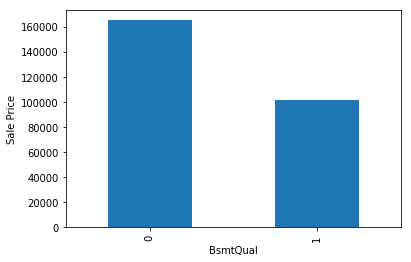

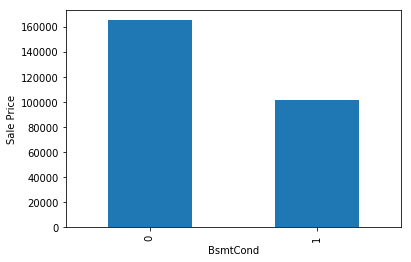

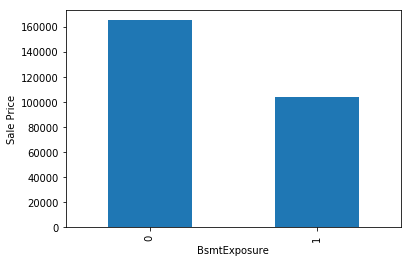

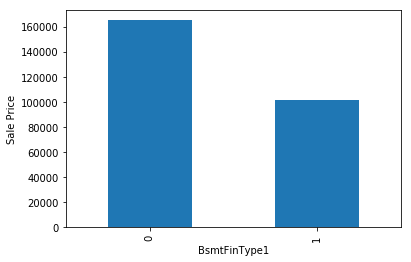

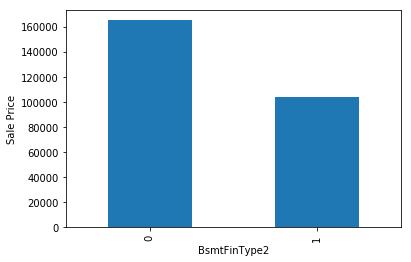

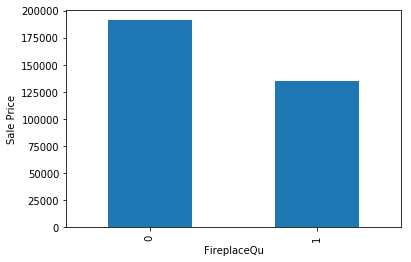

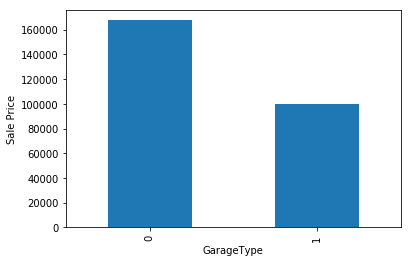

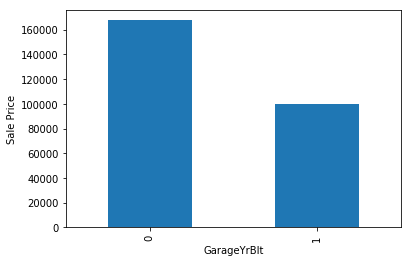

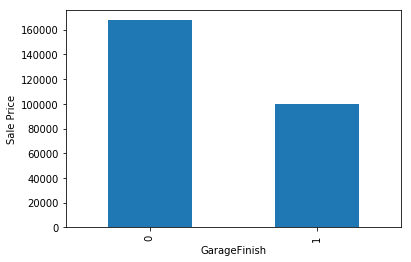

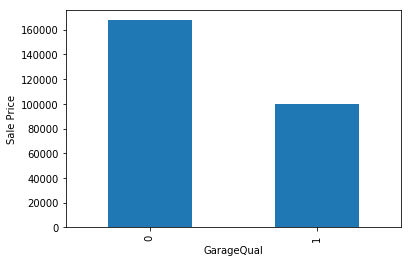

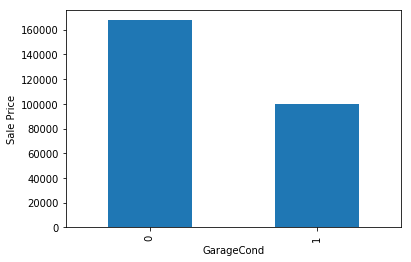

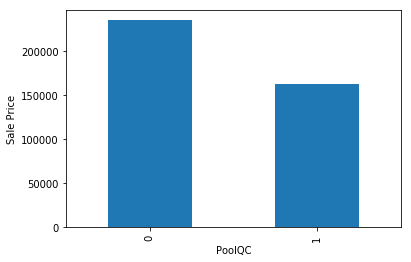

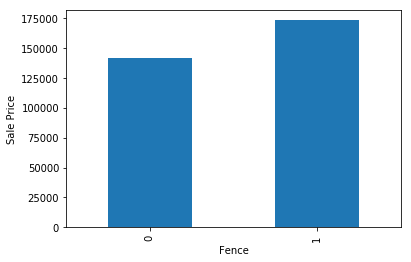

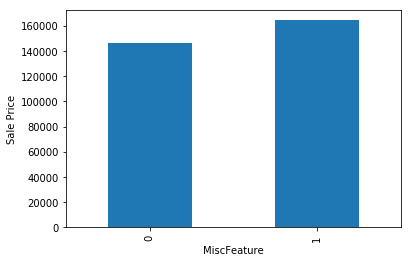

In [87]:
for feature in feature_with_nan:#plotting graph for finding out median of data in columns with null values 
    copy=dataset.copy()
    copy[feature]=np.where(dataset[feature].isnull(),1,0)
    copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

# Dividing dataset into numerical and categorical features

In [88]:
num_feature=[feature for feature in dataset.columns if dataset[feature].dtypes != "O"]
dataset[num_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [89]:
cat_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
dataset[cat_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# divide numerical data into discrete and continuous data

In [90]:
year_feature = [feature for feature in num_feature if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'Median House Pricing')

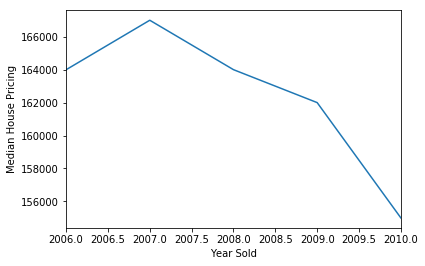

In [91]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Pricing')

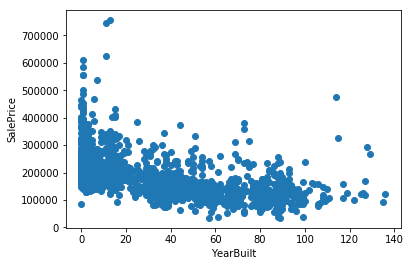

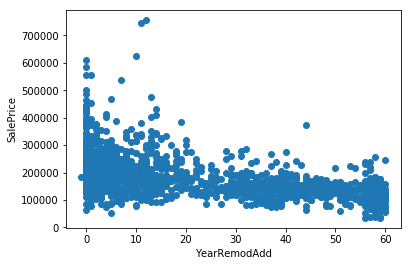

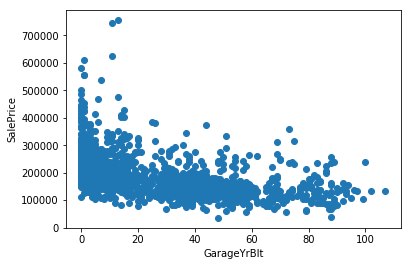

In [92]:
for feature in year_feature: # finding out differences in house rates based on year change
    if feature!= 'YrSold':
        data = dataset.copy()
        data[feature] = data["YrSold"]-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# dividing numerical feature into discrete and continuous features

In [93]:
discrete_feature = [feature for feature in num_feature if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
len(discrete_feature)

17

In [94]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


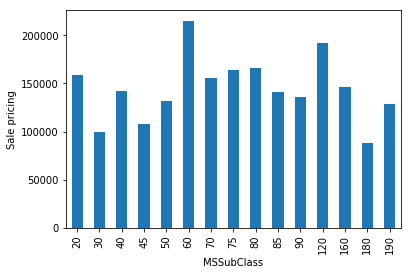

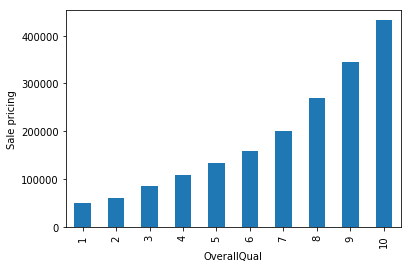

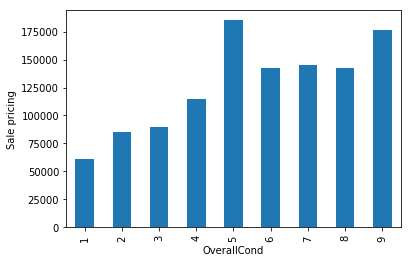

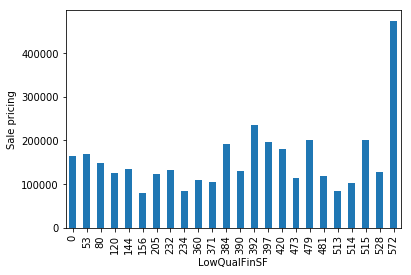

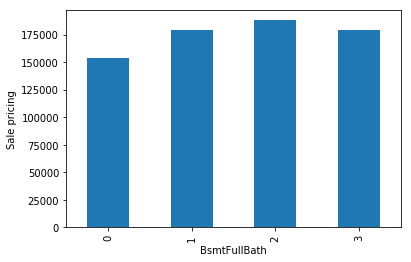

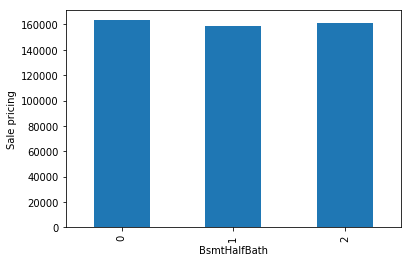

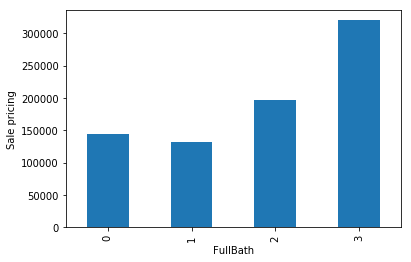

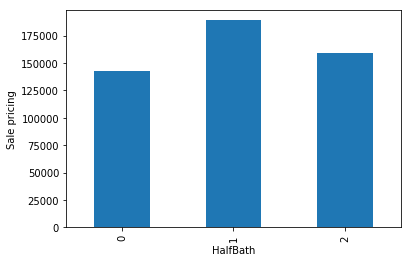

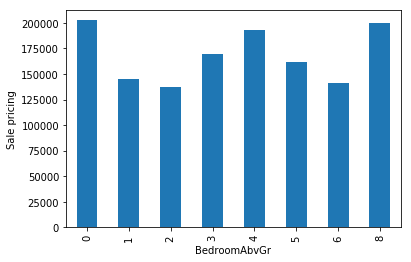

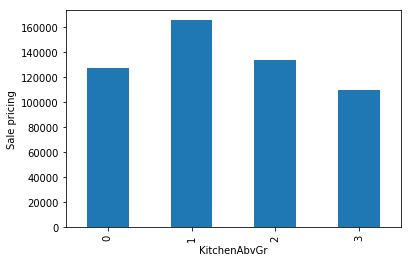

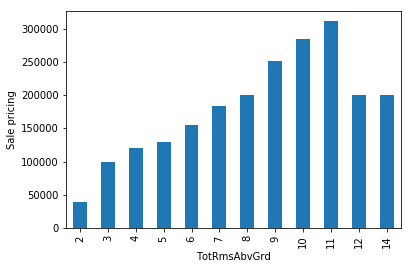

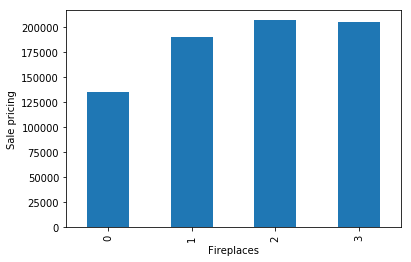

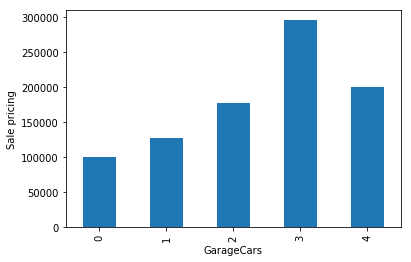

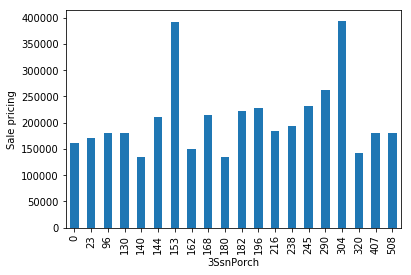

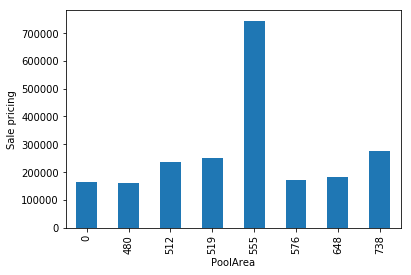

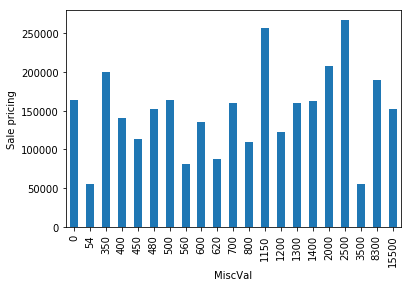

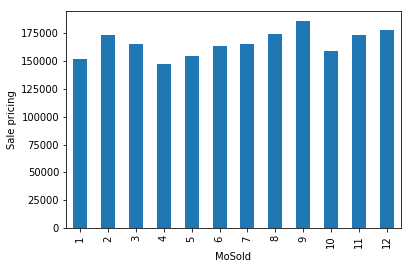

In [95]:
for feature in discrete_feature: #plotting median of discrete value features n dataset
    copy=dataset.copy()
    copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale pricing')
    plt.show()

In [96]:
continuous_feature = [feature for feature in num_feature if feature not in discrete_feature+ year_feature+['Id']]
len(continuous_feature)

16

In [97]:
dataset[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


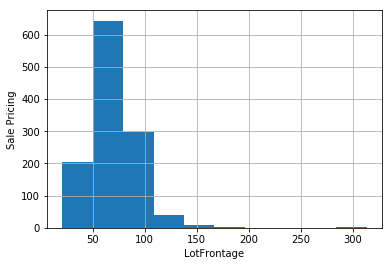

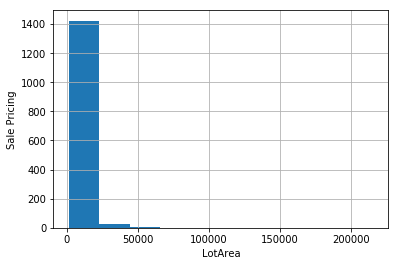

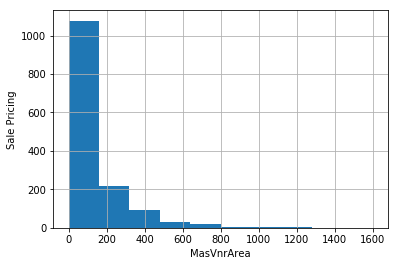

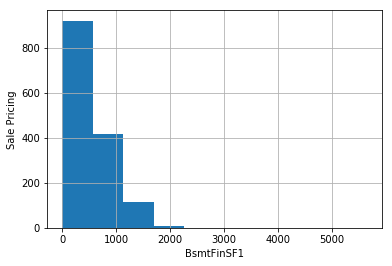

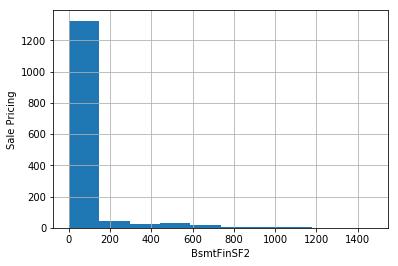

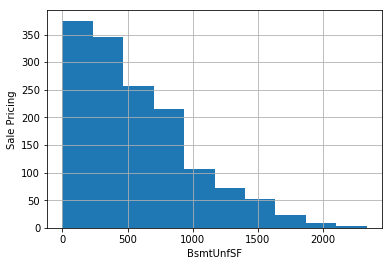

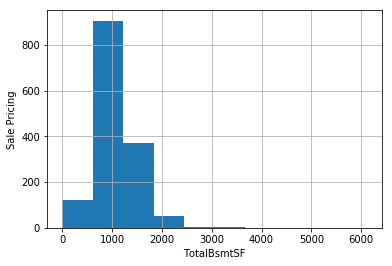

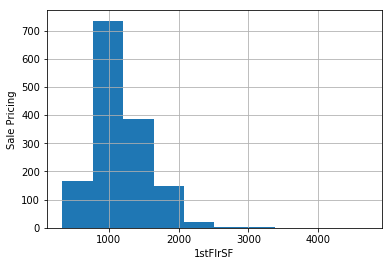

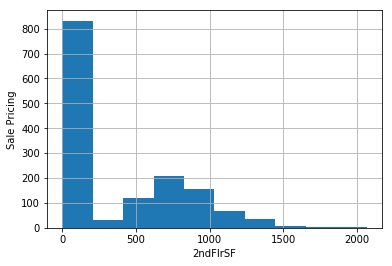

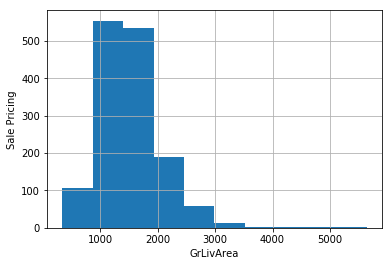

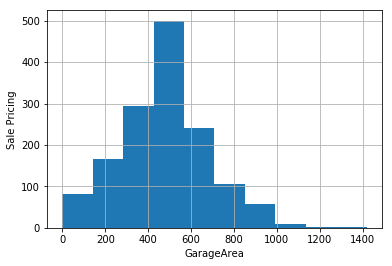

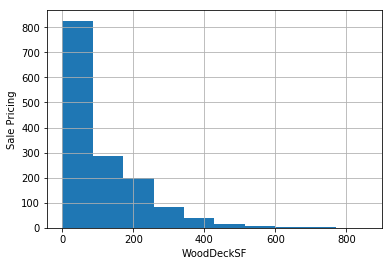

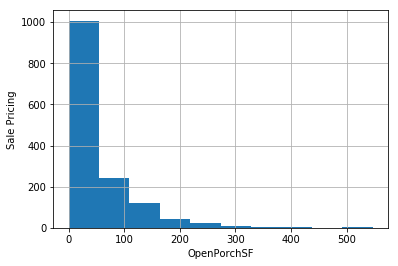

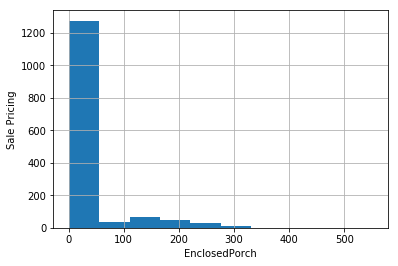

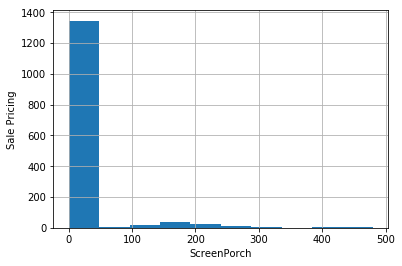

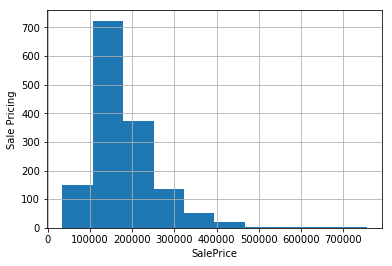

In [98]:
for feature in continuous_feature:#finding median of continuous feature median by plotting 
    #continuous features display a continuous distribution pattern 
    copy=dataset.copy()
    copy[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel('Sale Pricing')
    plt.show()

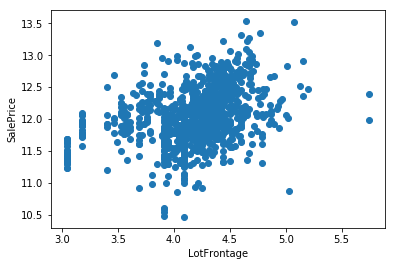

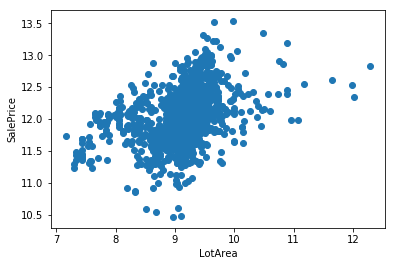

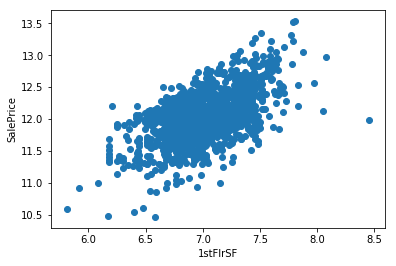

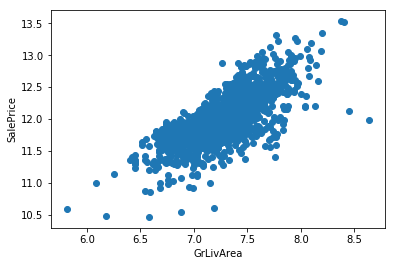

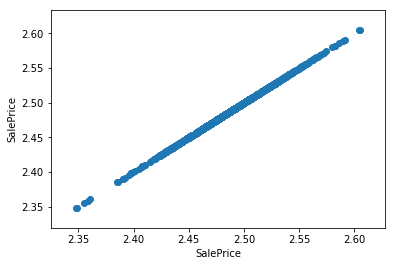

In [99]:
#using log transformation
for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# outliers

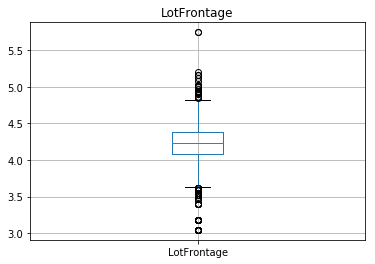

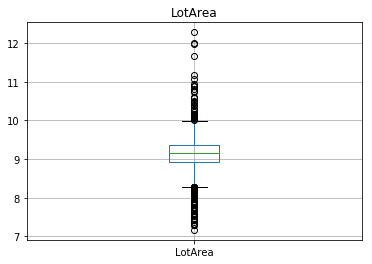

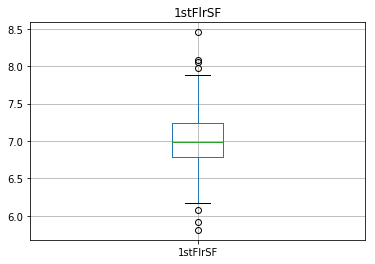

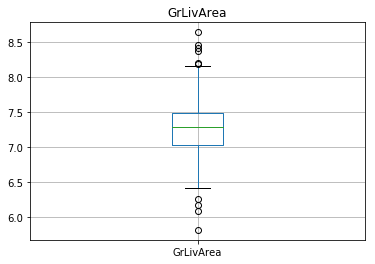

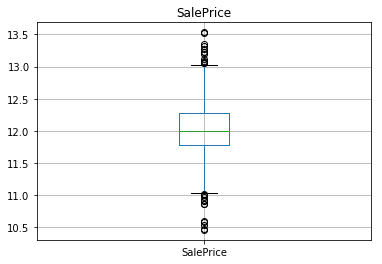

In [100]:
# for replacing missing value we need to consider outlier for determing whether to replace with 
#mean or median in place of missing value in dataset
for feature in continuous_feature:
    copy=dataset.copy()
    if 0 in copy[feature].unique():
        pass 
    else:
        copy[feature]=np.log(copy[feature])
        copy.boxplot(column=feature)
        plt.title(feature)
        plt.show()

#From the boxplot - if values are plotted outside the range we take median as replacement else mean

In [101]:
dataset[cat_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [102]:
#find unique values of columns 
for feature in cat_feature:
    print('Feature is {} having {} unique values'.format(feature,len(dataset[feature].unique())))

Feature is MSZoning having 5 unique values
Feature is Street having 2 unique values
Feature is Alley having 3 unique values
Feature is LotShape having 4 unique values
Feature is LandContour having 4 unique values
Feature is Utilities having 2 unique values
Feature is LotConfig having 5 unique values
Feature is LandSlope having 3 unique values
Feature is Neighborhood having 25 unique values
Feature is Condition1 having 9 unique values
Feature is Condition2 having 8 unique values
Feature is BldgType having 5 unique values
Feature is HouseStyle having 8 unique values
Feature is RoofStyle having 6 unique values
Feature is RoofMatl having 8 unique values
Feature is Exterior1st having 15 unique values
Feature is Exterior2nd having 16 unique values
Feature is MasVnrType having 5 unique values
Feature is ExterQual having 4 unique values
Feature is ExterCond having 5 unique values
Feature is Foundation having 6 unique values
Feature is BsmtQual having 5 unique values
Feature is BsmtCond having 

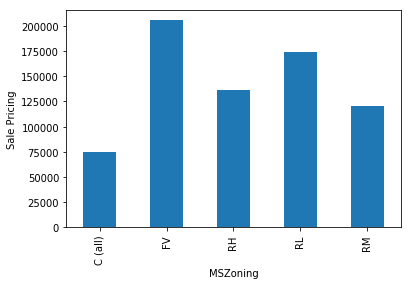

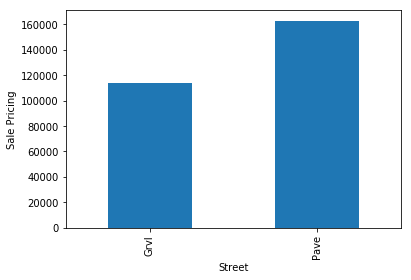

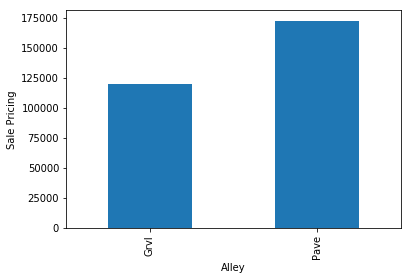

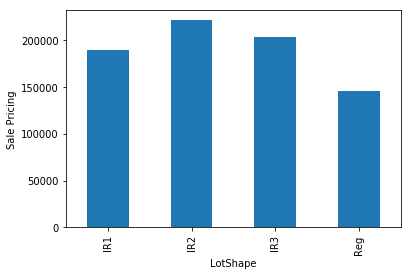

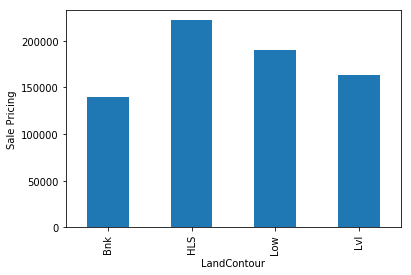

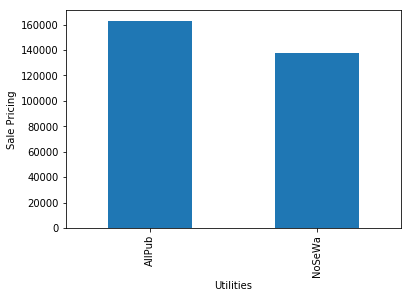

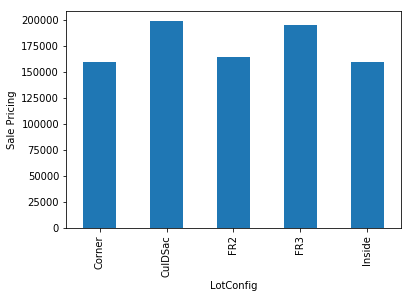

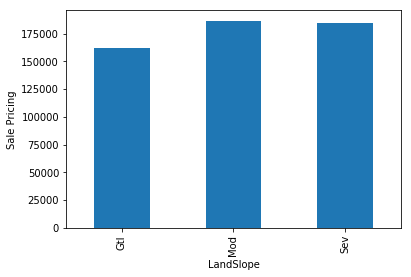

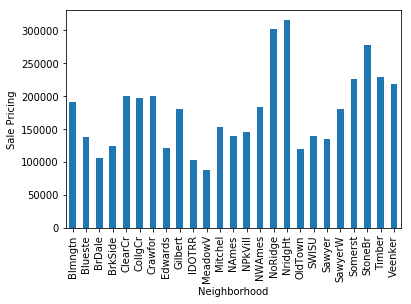

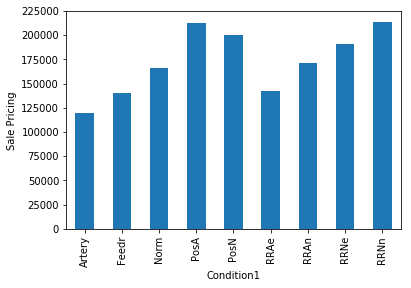

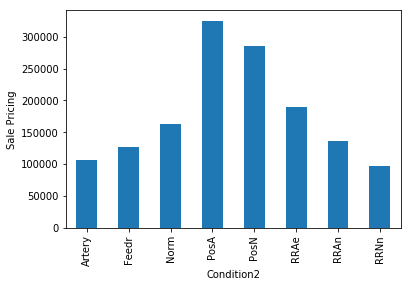

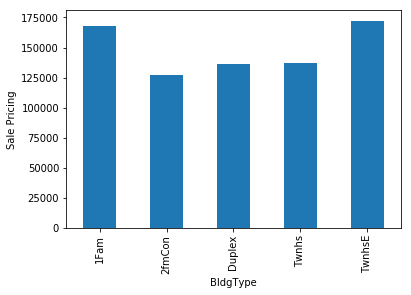

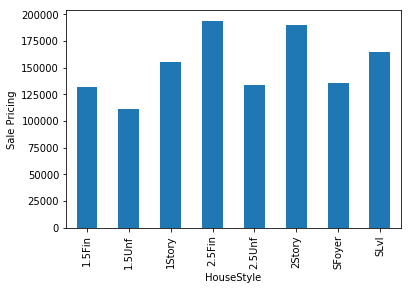

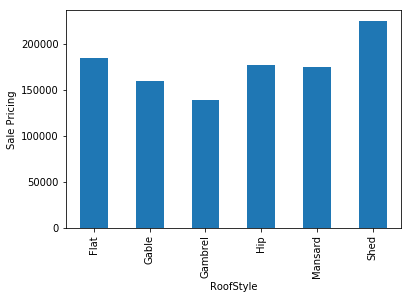

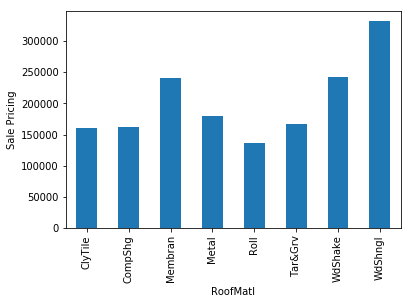

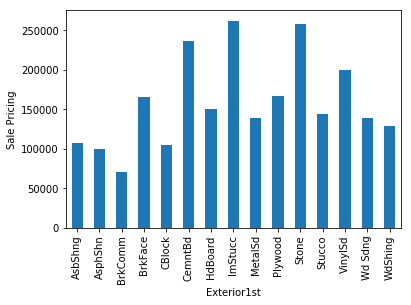

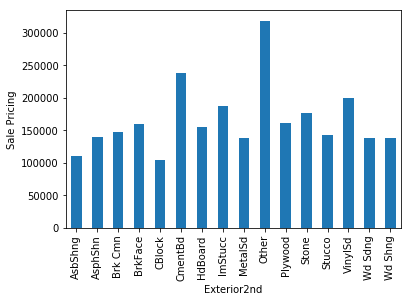

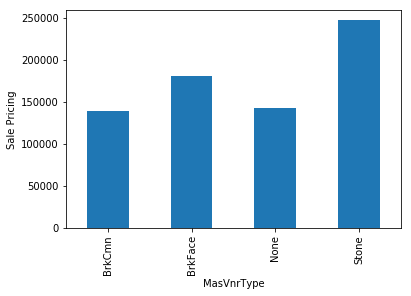

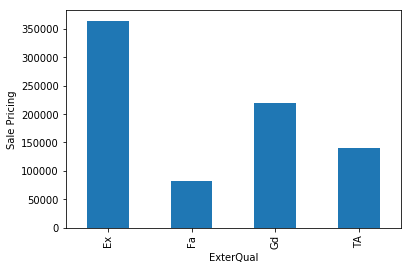

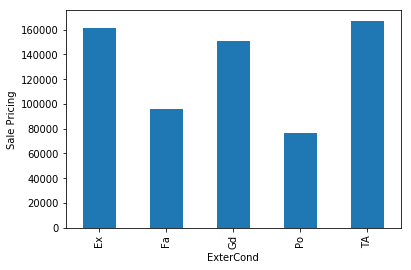

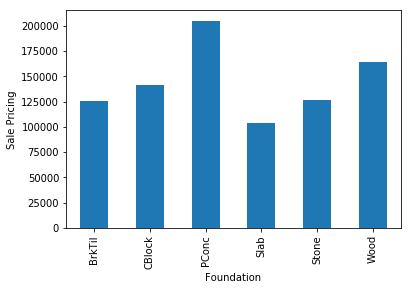

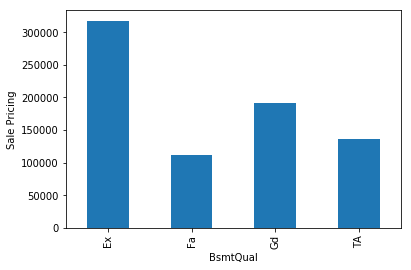

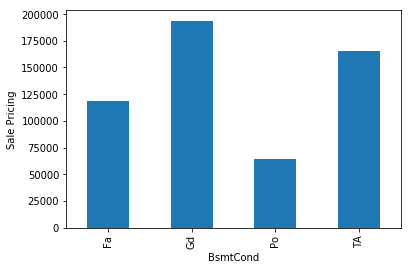

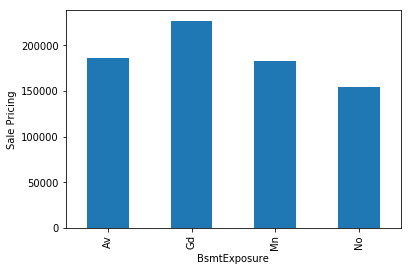

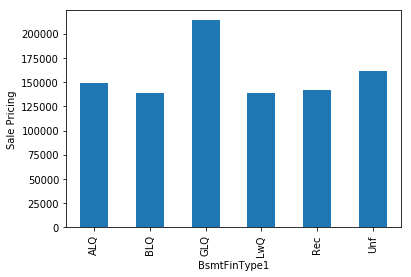

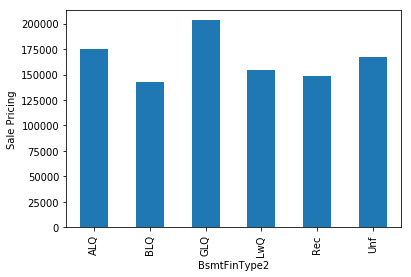

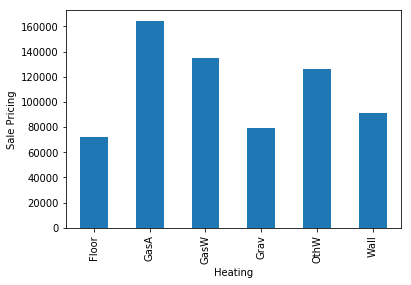

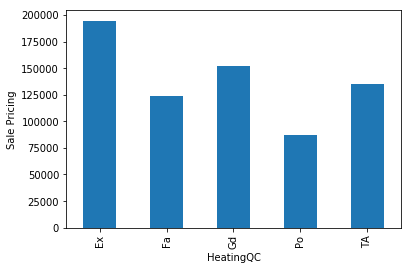

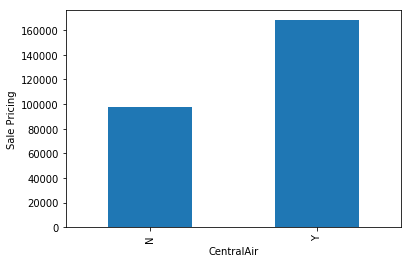

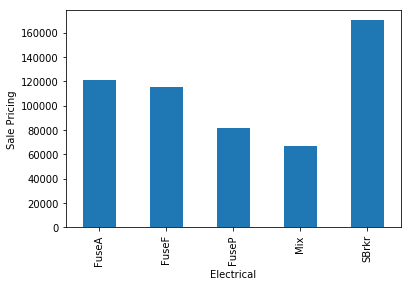

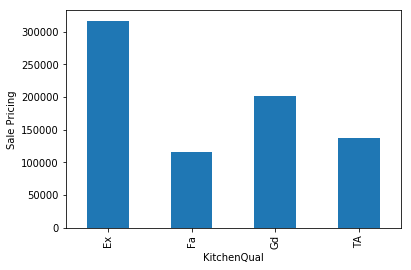

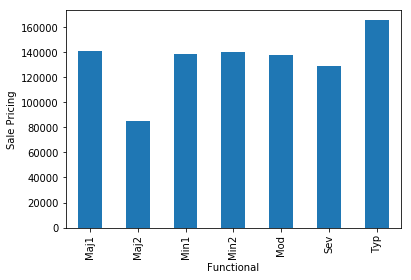

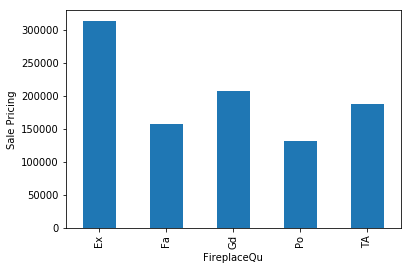

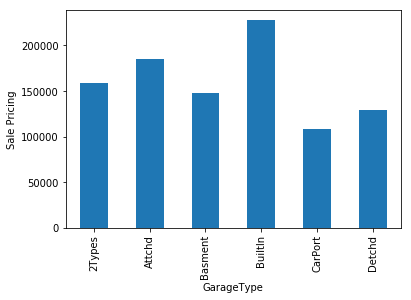

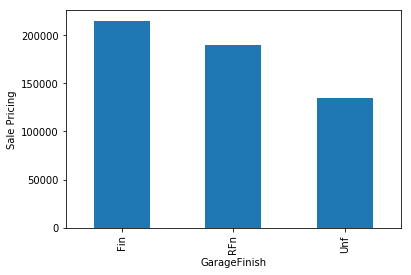

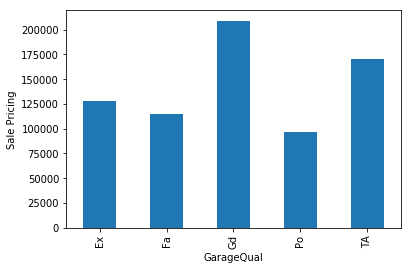

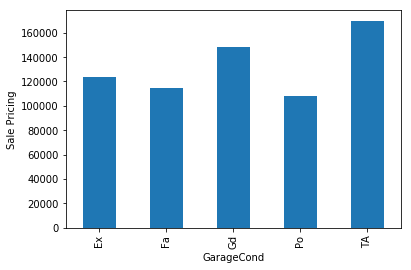

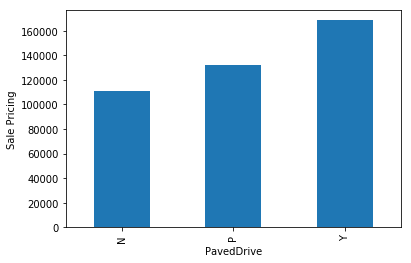

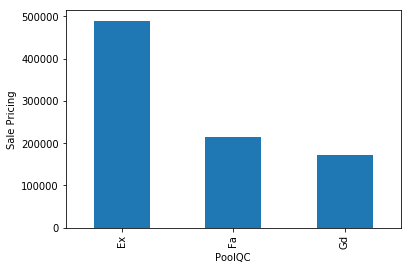

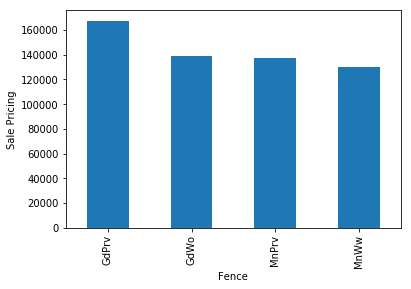

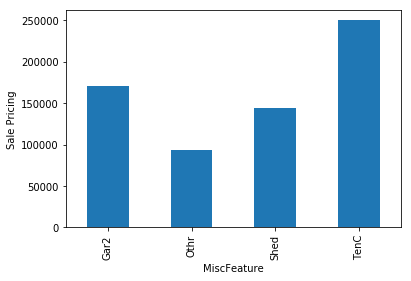

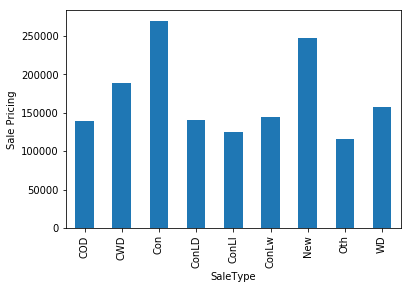

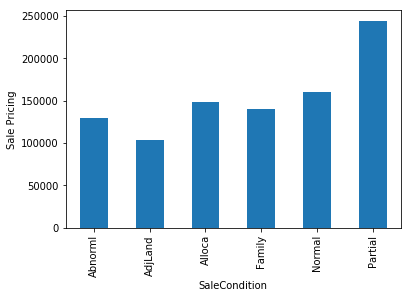

In [103]:
for feature in cat_feature: #plotting unique values median 
    copy=dataset.copy()
    copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Pricing')
    plt.show()

# replacing missing values

In [105]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [106]:
feature_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and feature in cat_feature]
dataset[feature_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [109]:
for feature in feature_nan:
    print("{}:{}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley:0.9377% missing values
MasVnrType:0.0055% missing values
BsmtQual:0.0253% missing values
BsmtCond:0.0253% missing values
BsmtExposure:0.026% missing values
BsmtFinType1:0.0253% missing values
BsmtFinType2:0.026% missing values
FireplaceQu:0.4726% missing values
GarageType:0.0555% missing values
GarageFinish:0.0555% missing values
GarageQual:0.0555% missing values
GarageCond:0.0555% missing values
PoolQC:0.9952% missing values
Fence:0.8075% missing values
MiscFeature:0.963% missing values


In [111]:
## replacing missing values in dataset 
def replace_cat_feature(dataset, feature_nan):
    data = dataset.copy()
    data[feature_nan] = data[feature_nan].fillna('Missing')
    return data
dataset = replace_cat_feature(dataset, feature_nan)
dataset[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [112]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [113]:
##numerical features having nan values

numerical_nan = [feature for feature in dataset.columns if feature in num_feature and dataset[feature].isnull().sum()>1]

for feature in numerical_nan:
    print("{}:{}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage:0.1774% missing values
MasVnrArea:0.0055% missing values
GarageYrBlt:0.0555% missing values


In [114]:
for feature in numerical_nan:
    median_value = dataset[feature].median()
    
    #capturing null values
    dataset[feature+' nan'] = np.where(dataset[feature].isnull(),1,0)
    #replacing with median value 
    dataset[feature].fillna(median_value,inplace=True)

dataset[numerical_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [115]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [116]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:#direct relation with the sale price
    dataset[feature] = dataset['YrSold']-dataset[feature]
    #dataset[feature].head()

In [117]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [118]:
num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in num_features:
    dataset[feature] = np.log(dataset[feature])

In [119]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [120]:
test=pd.read_csv("C:/Users/Riddhi Shah/Desktop/ml/Practice/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.0525
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.3940
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.6836
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.4775
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.0800


In [121]:
final=dataset.append(test,sort=False)#combining test and train dataset
final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0.0,0.0,0.0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0.0,0.0,0.0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0.0,0.0,0.0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0.0,0.0,0.0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0.0,0.0,0.0


In [200]:
final.shape

(2919, 278)

In [122]:
for feature in cat_feature:
    temp = final.groupby(feature)['LotFrontage'].count()/len(dataset)
    temp_df = temp[temp>0.01].index
    final[feature] = np.where(final[feature].isin(temp_df),final[feature],'Rare_var')

In [123]:
final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0.0,0.0,0.0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0.0,0.0,0.0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0.0,0.0,0.0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0.0,0.0,0.0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0.0,0.0,0.0


In [124]:
final.shape

(2919, 84)

In [125]:
final=pd.get_dummies(final)
#get_dummies works same as label encoder for the categorical data and adds columns to the dataset
final.shape

(2919, 278)

In [126]:
dataset=final[0:1460]#dividing test and train data now
dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLD,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,1,60,4.174387,9.041922,7,5,5,5,196.0,706.0,...,0,0,0,1,0,0,0,1,0,0
1,2,20,4.382027,9.169518,6,8,31,31,0.0,978.0,...,0,0,0,1,0,0,0,1,0,0
2,3,60,4.219508,9.328123,7,5,7,6,162.0,486.0,...,0,0,0,1,0,0,0,1,0,0
3,4,70,4.094345,9.164296,7,5,91,36,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,4.430817,9.565214,8,5,8,8,350.0,655.0,...,0,0,0,1,0,0,0,1,0,0


In [127]:
dataset.shape

(1460, 278)

In [128]:
test=final[1460:]
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLD,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,1461,20,80.0,11622.0,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,1,0,0
1,1462,20,81.0,14267.0,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,1,0,0
2,1463,60,74.0,13830.0,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,1,0,0
3,1464,60,78.0,9978.0,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,1,0,0
4,1465,120,43.0,5005.0,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,1,0,0


In [129]:
test.shape

(1459, 278)

In [130]:
dataset.dtypes

Id                          int64
MSSubClass                  int64
LotFrontage               float64
LotArea                   float64
OverallQual                 int64
OverallCond                 int64
YearBuilt                   int64
YearRemodAdd                int64
MasVnrArea                float64
BsmtFinSF1                float64
BsmtFinSF2                float64
BsmtUnfSF                 float64
TotalBsmtSF               float64
1stFlrSF                  float64
2ndFlrSF                    int64
LowQualFinSF                int64
GrLivArea                 float64
BsmtFullBath              float64
BsmtHalfBath              float64
FullBath                    int64
HalfBath                    int64
BedroomAbvGr                int64
KitchenAbvGr                int64
TotRmsAbvGrd                int64
Fireplaces                  int64
GarageYrBlt               float64
GarageCars                float64
GarageArea                float64
WoodDeckSF                  int64
OpenPorchSF   

In [131]:
dataset.to_csv('X_train.csv',index=False)

# feature selection

In [133]:
# use lasso model for overcoming overfitting problem and selecting features that are useful for prediction
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option('display.max_columns',None)

In [134]:
dataset=pd.read_csv("X_train.csv")#csv file - for fiting model for prediction

In [135]:
dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_var,Street_Pave,Street_Rare_var,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_Rare_var,LotShape_IR1,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_var,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_var,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_var,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_var,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_var,Condition2_Norm,Condition2_Rare_var,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_Rare_var,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Rare_var,RoofMatl_CompShg,RoofMatl_Rare_var,RoofMatl_Tar&Grv,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_var,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_var,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_var,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_var,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_var,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_Rare_var,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_var,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Rare_var,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rare_var,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rare_var,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Rare_var,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_var,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_var,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_var,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_var,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_Rare_var,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Missing,GarageType_Rare_var,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Rare_var,GarageFinish_Unf,GarageQual_Fa,GarageQu

In [136]:
y_train=dataset['SalePrice']#dependent variable - feature to be predicted 
y_train.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [137]:
X_train=dataset.drop(['Id','SalePrice'],axis=1)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_var,Street_Pave,Street_Rare_var,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_Rare_var,LotShape_IR1,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_var,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_var,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_var,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_var,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_var,Condition2_Norm,Condition2_Rare_var,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_Rare_var,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Rare_var,RoofMatl_CompShg,RoofMatl_Rare_var,RoofMatl_Tar&Grv,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_var,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_var,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_var,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_var,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_var,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_Rare_var,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_var,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Rare_var,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rare_var,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rare_var,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Rare_var,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_var,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_var,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_var,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_var,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_Rare_var,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Missing,GarageType_Rare_var,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Rare_var,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQ

In [138]:
#set a seed - random state in this function
feature_model=SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [140]:
feature_model.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [142]:
#columns with true values  are the selected features for prediction model
selected_feature=X_train.columns[(feature_model.get_support())]
print("Selected feature:{}".format(X_train.shape[1]))
print("Total features:{}".format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_model.estimator_.coef_ == 0)))

Selected feature:276
Total features:33
features with coefficients shrank to zero: 241


In [143]:
selected_feature

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MSZoning_RL', 'MSZoning_RM', 'Condition1_Norm', 'Foundation_PConc',
       'BsmtExposure_No', 'HeatingQC_Ex', 'KitchenQual_TA', 'FireplaceQu_Gd'],
      dtype='object')

In [144]:
X_train[selected_feature].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSZoning_RL,MSZoning_RM,Condition1_Norm,Foundation_PConc,BsmtExposure_No,HeatingQC_Ex,KitchenQual_TA,FireplaceQu_Gd
0,60,9.041922,7,5,5,5,196.0,706.0,0.0,150.0,856.0,6.752270,854,0,1.0,8,0,5.0,2.0,548.0,0,0,0,0,0,1,0,1,1,1,1,0,0
1,20,9.169518,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,7.140453,0,0,0.0,6,1,31.0,2.0,460.0,298,0,0,0,0,1,0,0,0,0,1,1,0
2,60,9.328123,7,5,7,6,162.0,486.0,0.0,434.0,920.0,6.824374,866,0,1.0,6,1,7.0,2.0,608.0,0,0,0,0,0,1,0,1,1,0,1,0,0
3,70,9.164296,7,5,91,36,0.0,216.0,0.0,540.0,756.0,6.867974,756,0,1.0,7,1,8.0,3.0,642.0,0,272,0,0,0,1,0,1,0,1,0,0,1
4,60,9.565214,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,0,1.0,9,1,8.0,3.0,836.0,192,0,0,0,0,1,0,1,1,0,1,0,0


In [145]:
X_train=X_train[selected_feature]
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSZoning_RL,MSZoning_RM,Condition1_Norm,Foundation_PConc,BsmtExposure_No,HeatingQC_Ex,KitchenQual_TA,FireplaceQu_Gd
0,60,9.041922,7,5,5,5,196.0,706.0,0.0,150.0,856.0,6.752270,854,0,1.0,8,0,5.0,2.0,548.0,0,0,0,0,0,1,0,1,1,1,1,0,0
1,20,9.169518,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,7.140453,0,0,0.0,6,1,31.0,2.0,460.0,298,0,0,0,0,1,0,0,0,0,1,1,0
2,60,9.328123,7,5,7,6,162.0,486.0,0.0,434.0,920.0,6.824374,866,0,1.0,6,1,7.0,2.0,608.0,0,0,0,0,0,1,0,1,1,0,1,0,0
3,70,9.164296,7,5,91,36,0.0,216.0,0.0,540.0,756.0,6.867974,756,0,1.0,7,1,8.0,3.0,642.0,0,272,0,0,0,1,0,1,0,1,0,0,1
4,60,9.565214,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,0,1.0,9,1,8.0,3.0,836.0,192,0,0,0,0,1,0,1,1,0,1,0,0


In [146]:
X_train.astype('int')

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSZoning_RL,MSZoning_RM,Condition1_Norm,Foundation_PConc,BsmtExposure_No,HeatingQC_Ex,KitchenQual_TA,FireplaceQu_Gd
0,60,9,7,5,5,5,196,706,0,150,856,6,854,0,1,8,0,5,2,548,0,0,0,0,0,1,0,1,1,1,1,0,0
1,20,9,6,8,31,31,0,978,0,284,1262,7,0,0,0,6,1,31,2,460,298,0,0,0,0,1,0,0,0,0,1,1,0
2,60,9,7,5,7,6,162,486,0,434,920,6,866,0,1,6,1,7,2,608,0,0,0,0,0,1,0,1,1,0,1,0,0
3,70,9,7,5,91,36,0,216,0,540,756,6,756,0,1,7,1,8,3,642,0,272,0,0,0,1,0,1,0,1,0,0,1
4,60,9,8,5,8,8,350,655,0,490,1145,7,1053,0,1,9,1,8,3,836,192,0,0,0,0,1,0,1,1,0,1,0,0
5,50,9,5,5,16,14,0,732,0,64,796,6,566,0,1,5,0,16,2,480,40,0,320,0,0,1,0,1,0,1,1,1,0
6,20,9,8,5,3,2,186,1369,0,317,1686,7,0,0,1,7,1,3,2,636,255,0,0,0,0,1,0,1,1,0,1,0,1
7,60,9,7,6,36,36,240,859,32,216,1107,7,983,0,1,7,2,36,2,484,235,228,0,0,0,1,0,0,0,0,1,1,0
8,50,8,7,5,77,58,0,0,0,952,952,6,752,0,0,8,2,77,2,468,90,205,0,0,0,0,1,0,0,1,0,1,0
9,190,8,5,6,69,58,0,851,0,140,991,6,0,0,1,5,2,69,1,205,0,0,0,0,0,1,0,0,0,1,1,1,0


# perform same pre processing with test data

In [147]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_var,Street_Pave,Street_Rare_var,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_Rare_var,LotShape_IR1,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_var,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_var,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_var,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_var,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_var,Condition2_Norm,Condition2_Rare_var,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_Rare_var,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Rare_var,RoofMatl_CompShg,RoofMatl_Rare_var,RoofMatl_Tar&Grv,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_var,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_var,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_var,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_var,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_var,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_Rare_var,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_var,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Rare_var,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rare_var,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rare_var,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Rare_var,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_var,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_var,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_var,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_var,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_Rare_var,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Missing,GarageType_Rare_var,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Rare_var,GarageFinish_Unf,GarageQual_Fa,GarageQu

In [150]:
cat_feature_test=[feature for feature in test.columns if test[feature].dtypes=='O']
cat_feature_test

[]

In [151]:
features_na = [feature for feature in test.columns if test[feature].isnull().sum()>1 and feature in cat_feature_test]
#for feature in features_na:
 #   print(feature, np.round(testdata[feature].isnull().mean(), 4), ':missing values')
features_na

[]

In [172]:
## replacing missing values 
def replace_cat_feature(dataset, features_na):
    data = test.copy()
    data[features_na] = data[features_na].fillna('Missing')
    return data

test = replace_cat_feature(test, features_na)
test[features_na].isnull().sum()

Series([], dtype: float64)

In [153]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_var,Street_Pave,Street_Rare_var,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_Rare_var,LotShape_IR1,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_var,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_var,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_var,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_var,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_var,Condition2_Norm,Condition2_Rare_var,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_Rare_var,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Rare_var,RoofMatl_CompShg,RoofMatl_Rare_var,RoofMatl_Tar&Grv,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_var,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_var,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_var,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_var,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_var,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_Rare_var,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_var,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Rare_var,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rare_var,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rare_var,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Rare_var,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_var,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_var,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_var,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_var,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_Rare_var,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Missing,GarageType_Rare_var,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Rare_var,GarageFinish_Unf,GarageQual_Fa,GarageQu

In [155]:
##numerical features having nan values

numerical_nan = [feature for feature in test.columns if test[feature].dtypes!='O' and test[feature].isnull().sum()>1]

for feature in numerical_nan:
    print("{}:{}% missing values".format(feature,np.round(test[feature].isnull().mean(),4)))

LotFrontage:0.1556% missing values
MasVnrArea:0.0103% missing values
BsmtFullBath:0.0014% missing values
BsmtHalfBath:0.0014% missing values
GarageYrBlt:0.0535% missing values
LotFrontage nan:1.0% missing values
MasVnrArea nan:1.0% missing values
GarageYrBlt nan:1.0% missing values


In [156]:
for feature in numerical_nan:
    median_value = test[feature].median()
    
    #capturing null values
    test[feature+' nan'] = np.where(test[feature].isnull(),1,0)
    
    test[feature].fillna(median_value,inplace=True)

test[numerical_nan].isnull().sum()

LotFrontage        0
MasVnrArea         0
BsmtFullBath       0
BsmtHalfBath       0
GarageYrBlt        0
LotFrontage nan    0
MasVnrArea nan     0
GarageYrBlt nan    0
dtype: int64

In [157]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_var,Street_Pave,Street_Rare_var,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_Rare_var,LotShape_IR1,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_var,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_var,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_var,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_var,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_var,Condition2_Norm,Condition2_Rare_var,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_Rare_var,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Rare_var,RoofMatl_CompShg,RoofMatl_Rare_var,RoofMatl_Tar&Grv,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_var,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_var,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_var,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_var,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_var,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_Rare_var,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_var,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Rare_var,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rare_var,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rare_var,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Rare_var,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_var,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_var,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_var,KitchenQual_TA,Functional_Maj1,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_var,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_Rare_var,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Missing,GarageType_Rare_var,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Rare_var,GarageFinish_Unf,GarageQual_Fa,GarageQu

In [158]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    test[feature] = test['YrSold']-test[feature]
    #dataset[feature].head()

In [159]:
test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [160]:
num_feature = ['LotFrontage','LotArea','1stFlrSF','GrLivArea']

for feature in num_feature:
    test[feature] = np.log(test[feature])

In [161]:
test.dtypes

Id                          int64
MSSubClass                  int64
LotFrontage               float64
LotArea                   float64
OverallQual                 int64
OverallCond                 int64
YearBuilt                   int64
YearRemodAdd                int64
MasVnrArea                float64
BsmtFinSF1                float64
BsmtFinSF2                float64
BsmtUnfSF                 float64
TotalBsmtSF               float64
1stFlrSF                  float64
2ndFlrSF                    int64
LowQualFinSF                int64
GrLivArea                 float64
BsmtFullBath              float64
BsmtHalfBath              float64
FullBath                    int64
HalfBath                    int64
BedroomAbvGr                int64
KitchenAbvGr                int64
TotRmsAbvGrd                int64
Fireplaces                  int64
GarageYrBlt               float64
GarageCars                float64
GarageArea                float64
WoodDeckSF                  int64
OpenPorchSF   

In [162]:
test=test[selected_feature]
test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSZoning_RL,MSZoning_RM,Condition1_Norm,Foundation_PConc,BsmtExposure_No,HeatingQC_Ex,KitchenQual_TA,FireplaceQu_Gd
0,20,9.360655,5,6,49,49,0.0,468.0,144.0,270.0,882.0,6.797940,0,0,0.0,5,0,49.0,1.0,730.0,140,0,0,120,0,0,0,0,0,1,0,1,0
1,20,9.565704,6,6,52,52,108.0,923.0,0.0,406.0,1329.0,7.192182,0,0,0.0,6,0,52.0,1.0,312.0,393,0,0,0,0,1,0,1,0,1,0,0,0
2,60,9.534595,5,5,13,12,0.0,791.0,0.0,137.0,928.0,6.833032,701,0,0.0,6,1,13.0,2.0,482.0,212,0,0,0,0,1,0,1,1,1,0,1,0
3,60,9.208138,6,6,12,12,20.0,602.0,0.0,324.0,926.0,6.830874,678,0,0.0,7,1,12.0,2.0,470.0,360,0,0,0,0,1,0,1,1,1,1,0,1
4,120,8.518193,8,5,18,18,0.0,263.0,0.0,1017.0,1280.0,7.154615,0,0,0.0,5,0,18.0,2.0,506.0,0,0,0,144,0,1,0,1,1,1,1,0,0


In [163]:
test.shape

(1459, 33)

In [168]:
cat = [feature for feature in test.columns if test[feature].dtypes != 'int64' and test[feature].dtypes !='float64']

In [169]:
cat

['MSZoning_RL',
 'MSZoning_RM',
 'Condition1_Norm',
 'Foundation_PConc',
 'BsmtExposure_No',
 'HeatingQC_Ex',
 'KitchenQual_TA',
 'FireplaceQu_Gd']

In [170]:
test.to_csv('Testing data')

In [174]:
test=test.fillna(0)

In [175]:
test.astype('int')

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSZoning_RL,MSZoning_RM,Condition1_Norm,Foundation_PConc,BsmtExposure_No,HeatingQC_Ex,KitchenQual_TA,FireplaceQu_Gd
0,20,9,5,6,49,49,0,468,144,270,882,6,0,0,0,5,0,49,1,730,140,0,0,120,0,0,0,0,0,1,0,1,0
1,20,9,6,6,52,52,108,923,0,406,1329,7,0,0,0,6,0,52,1,312,393,0,0,0,0,1,0,1,0,1,0,0,0
2,60,9,5,5,13,12,0,791,0,137,928,6,701,0,0,6,1,13,2,482,212,0,0,0,0,1,0,1,1,1,0,1,0
3,60,9,6,6,12,12,20,602,0,324,926,6,678,0,0,7,1,12,2,470,360,0,0,0,0,1,0,1,1,1,1,0,1
4,120,8,8,5,18,18,0,263,0,1017,1280,7,0,0,0,5,0,18,2,506,0,0,0,144,0,1,0,1,1,1,1,0,0
5,60,9,6,5,17,16,0,0,0,763,763,6,892,0,0,7,1,17,2,440,157,0,0,0,0,1,0,1,1,1,0,1,0
6,20,8,6,7,18,3,0,935,0,233,1168,7,0,0,1,6,0,18,2,420,483,0,0,0,0,1,0,1,1,1,1,1,0
7,60,9,6,5,12,12,0,0,0,789,789,6,676,0,0,7,1,12,2,393,0,0,0,0,0,1,0,1,1,1,0,1,1
8,20,9,7,5,20,20,0,637,0,663,1300,7,0,0,1,5,1,20,2,506,192,0,0,0,0,1,0,1,1,0,0,0,0
9,20,9,4,5,40,40,0,804,78,0,882,6,0,0,1,4,0,40,2,525,240,0,0,0,0,1,0,1,0,1,0,1,0


In [180]:
from sklearn.linear_model import LinearRegression #here we have used regression model for predictiing house rates
regression=LinearRegression()
regression.fit(X_train,y_train)
accuracy=round(regression.score(X_train,y_train)*100, 2)

In [181]:
accuracy

88.8

In [192]:
prediction1=regression.predict(test)#prediction done on test data
prediction1

array([11.62479153, 11.93817949, 12.0548121 , ..., 12.11187109,
       11.70162669, 12.38149028])

In [187]:
pd.DataFrame(np.exp(prediction)).to_csv('prediction', index = False)

In [188]:
from sklearn.svm import SVR # another model used for finding best accuracy of the model 
svr = SVR()
svr.fit(X_train, y_train)
acc1 = round(svr.score(X_train, y_train) * 100, 2)
acc1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


93.75

In [191]:
prediction2=svr.predict(test)
prediction2

array([12.03113712, 12.03113712, 12.03113712, ..., 12.03113712,
       12.03113712, 12.03113712])

In [199]:
prediction2 = np.exp(prediction2)

In [195]:
pd.DataFrame(prediction2).to_csv('Predict')

In [197]:
test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSZoning_RL,MSZoning_RM,Condition1_Norm,Foundation_PConc,BsmtExposure_No,HeatingQC_Ex,KitchenQual_TA,FireplaceQu_Gd
0,20,9.360655,5,6,49,49,0.0,468.0,144.0,270.0,882.0,6.797940,0,0,0.0,5,0,49.0,1.0,730.0,140,0,0,120,0,0,0,0,0,1,0,1,0
1,20,9.565704,6,6,52,52,108.0,923.0,0.0,406.0,1329.0,7.192182,0,0,0.0,6,0,52.0,1.0,312.0,393,0,0,0,0,1,0,1,0,1,0,0,0
2,60,9.534595,5,5,13,12,0.0,791.0,0.0,137.0,928.0,6.833032,701,0,0.0,6,1,13.0,2.0,482.0,212,0,0,0,0,1,0,1,1,1,0,1,0
3,60,9.208138,6,6,12,12,20.0,602.0,0.0,324.0,926.0,6.830874,678,0,0.0,7,1,12.0,2.0,470.0,360,0,0,0,0,1,0,1,1,1,1,0,1
4,120,8.518193,8,5,18,18,0.0,263.0,0.0,1017.0,1280.0,7.154615,0,0,0.0,5,0,18.0,2.0,506.0,0,0,0,144,0,1,0,1,1,1,1,0,0
